In [1]:
using CLOUD, Plots, Plots.PlotMeasures
p = 4
ref_tet = ReferenceApproximation(NodalTensor(p), Tet(),
    volume_quadrature_rule=(LGQuadrature(p),
        LGQuadrature(p), GaussQuadrature(p,1,0)), 
    facet_quadrature_rule=(LGQuadrature(p), 
        GaussQuadrature(p,1,0)));

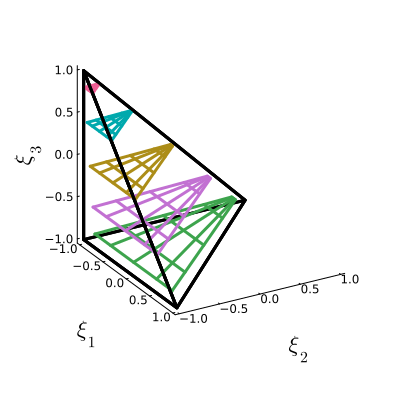

In [2]:
p_tet_tensor_vol = plot(ref_tet, sketch=false, volume_quadrature=true,
    volume_connect=true, facet_quadrature=false,
    facet_connect=true, facet_inds=[3,4,1,2], 
    xlims=[-1.05,1.05],ylims=[-1.05,1.05], zlims=[-1.05,1.05],
    facet_color_inds=[3,4,1,2], camera=(60,25), grid_line_width=3, edges=true, redraw_edge=true)

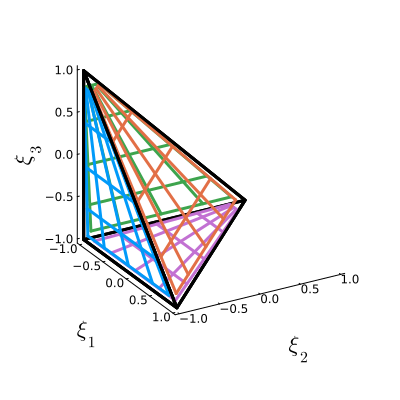

In [3]:
p_tet_tensor_fac = plot(ref_tet, sketch=false, volume_quadrature=false,
    volume_connect=true, facet_quadrature=true,
    facet_connect=true, facet_inds=[3,4,1,2], 
    xlims=[-1.05,1.05],ylims=[-1.05,1.05],zlims=[-1.05,1.05],
    facet_color_inds=[3,4,1,2], camera=(60,25), grid_line_width=3, edges=true, redraw_edge=true)

In [4]:
savefig(p_tet_tensor_vol, "tet_volume_nodes_LG_LG_JG.pdf")
savefig(p_tet_tensor_fac, "tet_facet_nodes_LG_JG.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tet_facet_nodes_LG_JG.pdf"

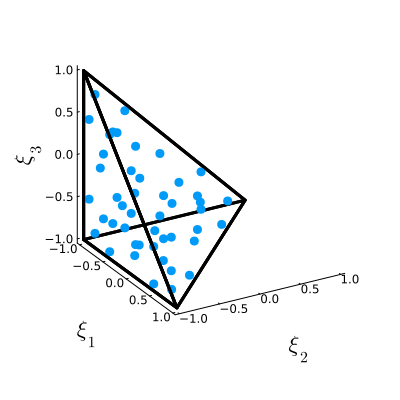

In [5]:
ref_tet_multi = ReferenceApproximation(
    NodalMulti(p), Tet(), mapping_degree=2)
p_tet_multi_vol = plot(ref_tet_multi, 
    sketch=false, volume_quadrature=true,
   facet_quadrature=false,
    facet_connect=false, facet_inds=[3,4,1,2], 
    xlims=[-1.05,1.05],ylims=[-1.05,1.05],zlims=[-1.05,1.05],
    facet_color_inds=[3,4,1,2], camera=(60,25), grid_line_width=3, edges=true, redraw_edge=true)

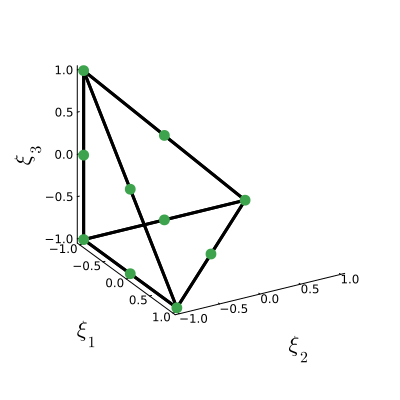

In [6]:
p_tet_multi_map = plot(ref_tet_multi, 
    sketch=false, volume_quadrature=false,
    mapping_nodes=true,
   facet_quadrature=false,
    facet_connect=false, facet_inds=[3,4,1,2], 
    xlims=[-1.05,1.05],ylims=[-1.05,1.05],zlims=[-1.05,1.05], markersize=6,
    facet_color_inds=[3,4,1,2], camera=(60,25), grid_line_width=3, edges=true, redraw_edge=false)

In [7]:
savefig(p_tet_multi_vol, "tet_multi_nodes.pdf")
savefig(p_tet_multi_map, "tet_mapping_nodes.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tet_mapping_nodes.pdf"

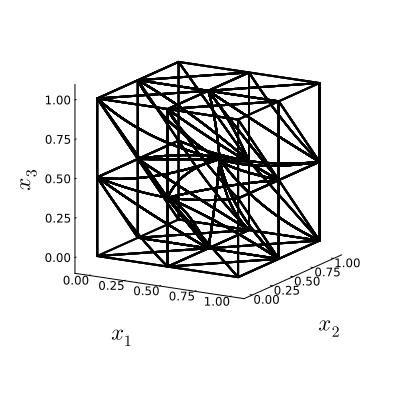

In [8]:
L=1.0
M=2
uniform_mesh = uniform_periodic_mesh(ref_tet_multi, 
    ((0.0,L),(0.0,L),(0.0,L)), (M,M,M))

mesh = warp_mesh(uniform_mesh, ref_tet_multi, 
    ChanWarping(1/16,(L,L,L)))

spatial_discretization = SpatialDiscretization(mesh, 
    ref_tet_multi, project_jacobian=true)

mesh_tet = plot(spatial_discretization, volume_quadrature=false, 
    facet_quadrature=false, fmt=:png, camera=(30,15), 
    xlims=[-0.1,1.1], ylims=[-0.1,1.1], zlims=[-0.1,1.1], linewidth=2)

In [9]:
savefig(mesh_tet, "tet_mesh.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/notebooks/tet_mesh.pdf"